In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

# Data Import

In [2]:
raw_data = pd.read_csv('bq-results-20200613-172659-qyga7irf1y6u.csv')

In [6]:
parsed_data = pd.concat([
        raw_data['project_name'], 
        pd.to_datetime(raw_data['earliest_commit_sec'], unit='s'),
        pd.to_datetime(raw_data['latest_commit_sec'], unit='s'),
        raw_data['number_of_commits']
    ], axis=1
)
parsed_data.set_index(['project_name'], inplace=True)

# get an idea of "now" that accounts for when the dataset was actually updated
now = parsed_data['earliest_commit_sec'].max()

parsed_data = parsed_data.loc[parsed_data.latest_commit_sec < (now - pd.Timedelta(days=90))]
parsed_data['project_age'] = parsed_data.latest_commit_sec - parsed_data.earliest_commit_sec

In [9]:
data = parsed_data.copy()
all_project_ages = data.project_age.dt.days / 365.25
all_project_ages = all_project_ages.loc[all_project_ages > 0]
all_project_ages.name = 'project_age_years'

# Data exploration

In [10]:
project_ages = all_project_ages.copy()

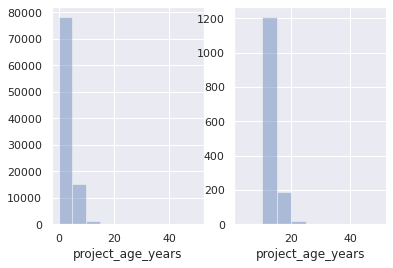

In [60]:
fig.clear()
fig, ax = plt.subplots()
plt.subplot(1, 2, 1)
sns.distplot(project_ages, kde=False, bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.subplot(1, 2, 2)
sns.distplot(project_ages, kde=False, bins=[10, 15, 20, 25, 30, 35, 40, 45, 50])
fig.savefig('project_age_years_hist.svg', bbox_inches='tight')

In [12]:
project_ages = project_ages.loc[project_ages < 20]

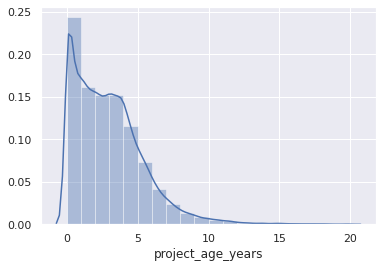

In [13]:
fig, ax = plt.subplots()
sns.distplot(project_ages, ax=ax, bins=range(20))
fig.savefig('project-age-simple-distribution.svg', bbox_inches='tight')

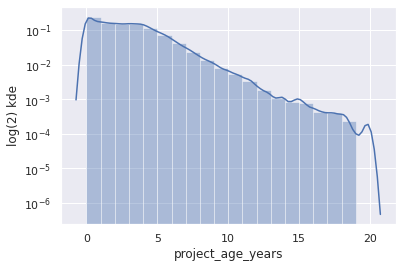

In [15]:
fig, ax = plt.subplots()
sns.distplot(project_ages, ax=ax, bins=range(20))
ax.set_yscale('log')
ax.set_ylabel('log(2) kde')
fig.savefig('project-age-log-distribution.svg')

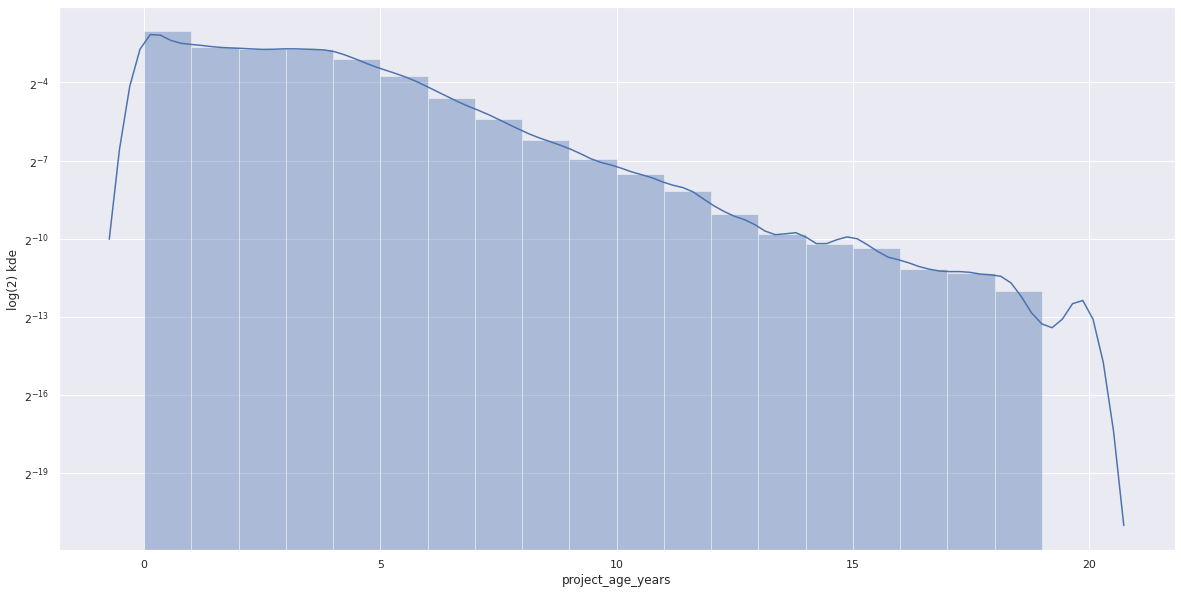

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(project_ages, ax=ax, bins=range(20))
ax.set_yscale('log', basey=2)
ax.set_ylabel('log(2) kde')
fig.savefig('project-age-log-distribution-filtered.svg', bbox_inches='tight')

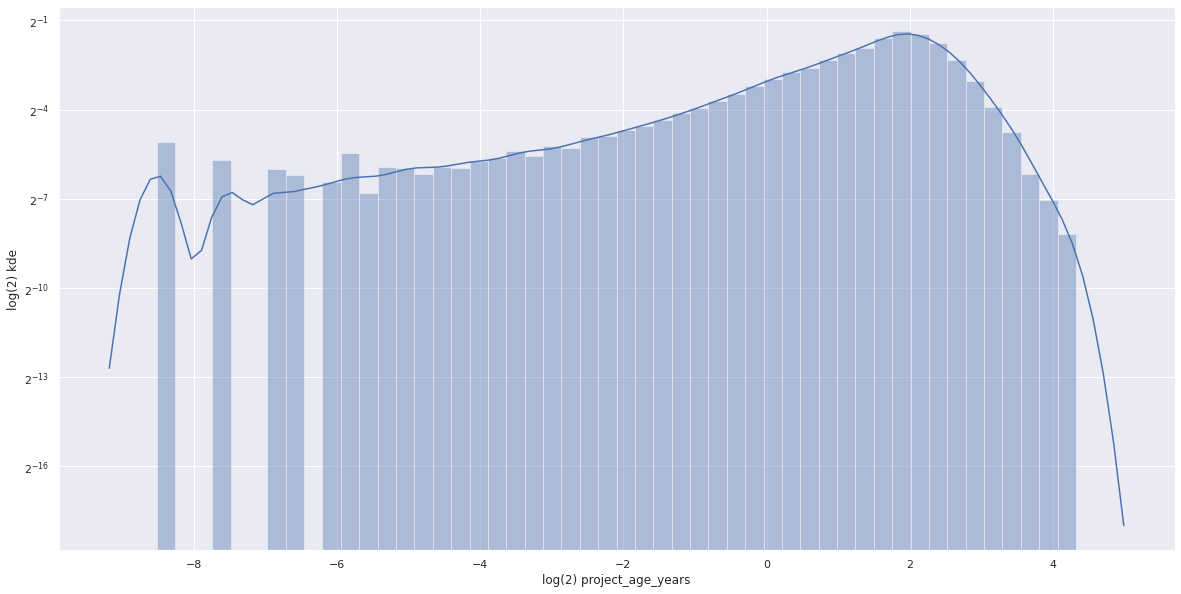

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(np.log2(project_ages), ax=ax)
ax.set_yscale('log', basey=2)
ax.set_ylabel('log(2) kde')
ax.set_xlabel('log(2) project_age_years')
fig.savefig('project-age-log-log-distribution-filtered.svg', bbox_inches='tight')

# Analysis

In [223]:
def compute_life_expectancies(data_points, max_age):
    years = []
    rle = []
    samples_used = []
    for year in range(0, 2*max_age):
        year = year/2.0
        
        projects_that_live_long_enough = project_ages.loc[project_ages > year]
        
        years.append(year)
        rle.append((projects_that_live_long_enough - year).mean())
        samples_used.append(projects_that_live_long_enough.count())
    
    return years, rle, samples_used

def plot_expectancies(years, rle, samples_used):

    fig, ax = plt.subplots(figsize=(20,10))

    l1 = ax.plot(years, rle, label='remaining_life_expectancy')
    ax.set_xlabel('project_current_age_years')
    ax.set_ylabel('mean_remaining_life_expectancy_years')
    ax.set_ylim([0, max(rle)*1.1])
    ax.set_xlim([0, max(years)*1.1])
    ax.set_xticks(range(int(max(years) + 1)))


    ax2 = ax.twinx()
    l2 = ax2.plot(years, samples_used, label='samples_used', color='grey', alpha=0.2)
    ax2.set_yscale('log')
    ax2.set_ylabel('log(10) number_of_samples_used')
    
    ax2.set_xlim([0, max(years)*1.1])
    ax2.set_xticks(range(int(max(years) + 1)))
    ax2.set_yticks([10**x for x in range(int(np.log10(max(samples_used))) + 2)])
    

    ax.figure.legend()
    return fig


## remaining life expectancies - all data points

In [224]:
try:
    fig.clear()
    del fig
except NameError:
    pass


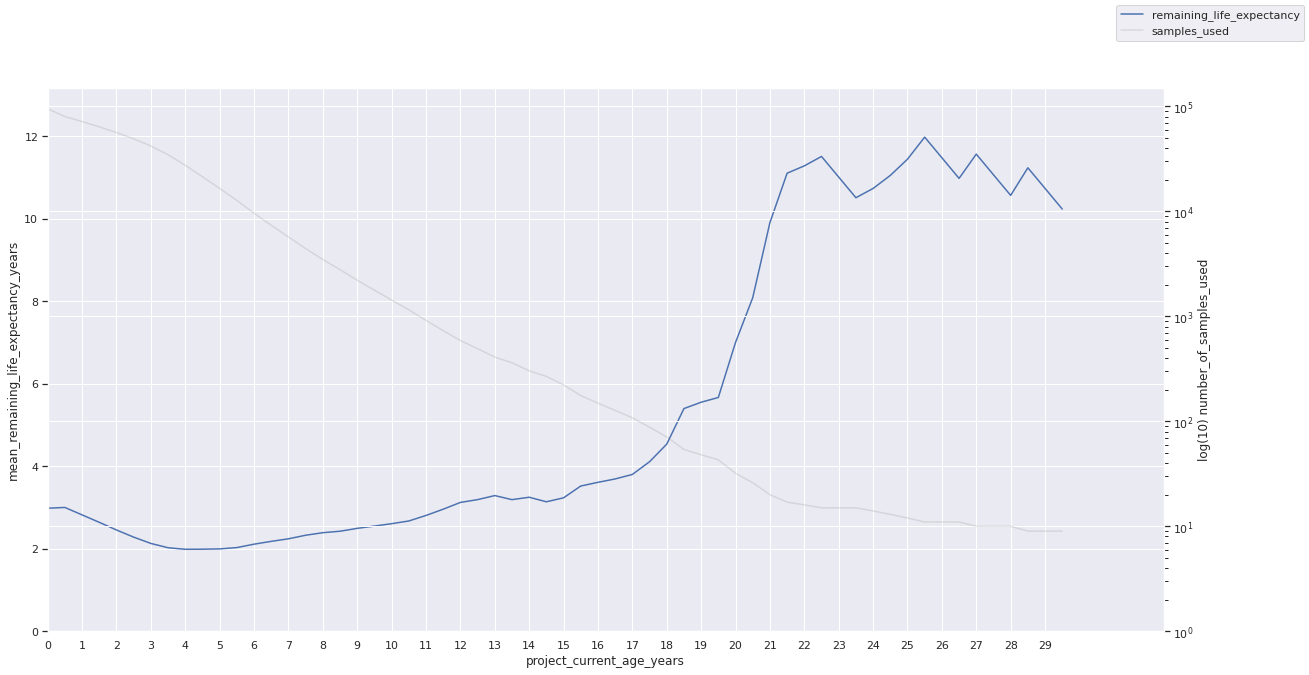

In [225]:
project_ages = all_project_ages.copy()
years, rle, samples_used = compute_life_expectancies(project_ages, 30)

fig = plot_expectancies(years, rle, samples_used)
fig.savefig('remaining_life_expectancy_all.svg', bbox_inches='tight')

## remaining life expectancies - cut down

In [226]:
try:
    fig.clear()
    del fig
except NameError:
    pass


In [227]:

project_ages = all_project_ages.copy()
project_ages = project_ages.loc[project_ages < 30]

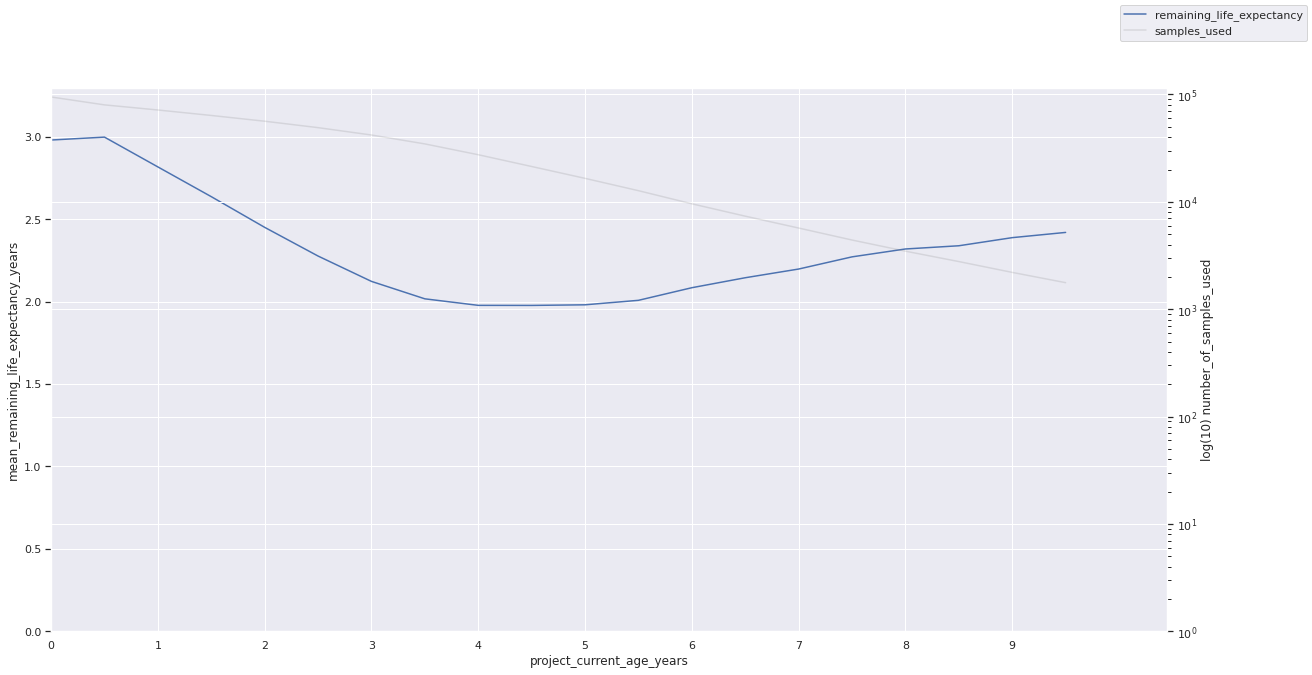

In [228]:

years, rle, samples_used = compute_life_expectancies(project_ages, 10)

fig = plot_expectancies(years, rle, samples_used)
fig.savefig('remaining_life_expectancy_sub_10.svg', bbox_inches='tight')